### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image
from torch_geometric.loader import DataLoader

from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer
from enums import EnvironmentType

%run graphUtils.py
%run Visualizer.py # --allows for reloading the particular code
#%run CGConv.py

#### Train the network

In [2]:
n = 15
popsize = 10
generations = 500
batch_size = 8
wrap_around = True
with_global_node = False
env_type = EnvironmentType.Clusters
food_amount = 50
name = 'centered17'
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, batch_size, True, with_global_node, food_amount, env_type, popsize)

2023-03-22 13:10:32,499	INFO worker.py:1528 -- Started a local Ray instance.


[2023-03-22 13:10:34] INFO     <55785> evotorch.core: Instance of `Custom_NEProblem` (id:11187692752) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-03-22 13:10:34] INFO     <55785> evotorch.core: Instance of `Custom_NEProblem` (id:11187692752) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-03-22 13:10:34] INFO     <55785> evotorch.core: Instance of `Custom_NEProblem` (id:11187692752) -- The `device` of the problem is set as cpu
[2023-03-22 13:10:34] INFO     <55785> evotorch.core: Instance of `Custom_NEProblem` (id:11187692752) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-03-22 13:10:34] INFO     <55785> evotorch.core: Instance of `Custom_NEProblem` (id:11187692752) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
#[trainer.searcher.before_step_hook() for i in range(100)]

In [4]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0395)
    mean_eval : 13.89905071258545
pop_best_eval : 21.559284210205078
  median_eval : 13.04965591430664

         iter : 2
     stepsize : ReadOnlyTensor(0.0390)
    mean_eval : 10.81208610534668
pop_best_eval : 15.645355224609375
  median_eval : 9.979804992675781

         iter : 3
     stepsize : ReadOnlyTensor(0.0386)
    mean_eval : 9.6272611618042
pop_best_eval : 14.71865463256836
  median_eval : 9.262517929077148

         iter : 4
     stepsize : ReadOnlyTensor(0.0382)
    mean_eval : 6.508615970611572
pop_best_eval : 8.960068702697754
  median_eval : 6.541909217834473

         iter : 5
     stepsize : ReadOnlyTensor(0.0378)
    mean_eval : 8.424871444702148
pop_best_eval : 13.275856971740723
  median_eval : 8.07861042022705

         iter : 6
     stepsize : ReadOnlyTensor(0.0374)
    mean_eval : 9.901533126831055
pop_best_eval : 14.711483001708984
  median_eval : 10.892748832702637

         iter : 7
     stepsize : Read

In [ ]:
network = trainer.get_trained_network()

In [ ]:
#trainer.logger_df.from_csv('../logger/' + name + '.csv')
network.load_state_dict(torch.load('../models/' + name + '.pth'))

<All keys matched successfully>

In [ ]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj0_pop_best'])

In [ ]:
#trainer.searcher.status

#### Visualize trained network

In [ ]:
v_batch_size= 8
graphs = [generate_organism(n, device, with_global_node, food_amount, env_type).toGraph() for _ in range(v_batch_size)]
loader = DataLoader(graphs, batch_size=v_batch_size)
graph = next(iter(loader))
visualizer = Visualizer(wrap_around, v_batch_size)
network.batch_size = v_batch_size
network(graph, 0)

DataBatch(x=[1688, 5], edge_index=[1, 0], device=[8], subsize=[8], energy=[8], velocity=[8], border_cost=[8], food_reward=[8], dead_cost=[8], visible_food=[8], food_avg_dist=[8], food_avg_degree=[8], food_search_movement=[8], batch=[1688], ptr=[9])

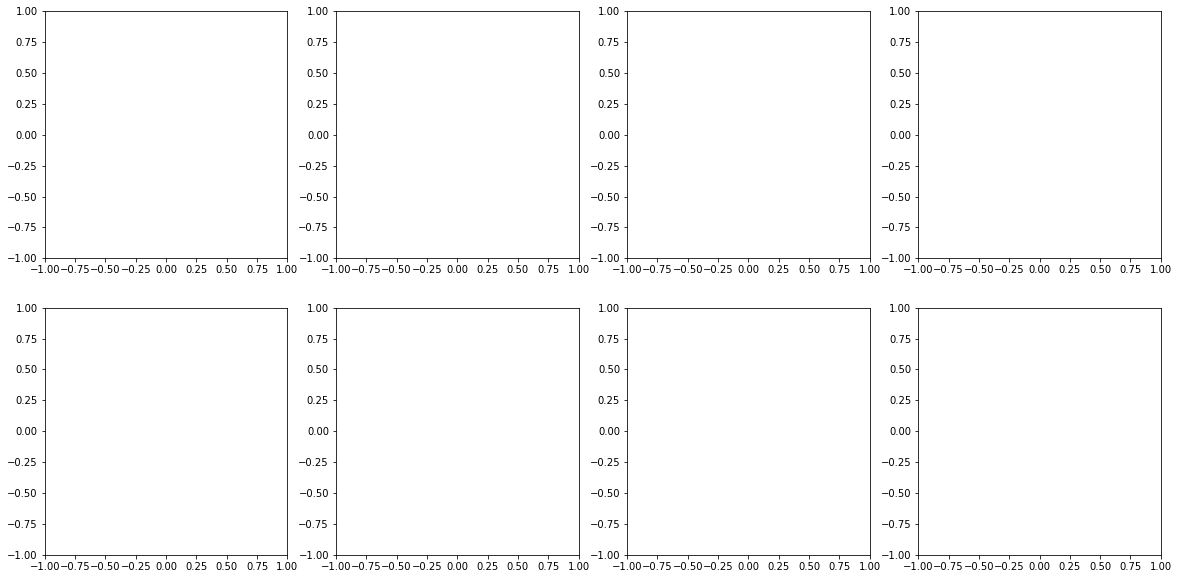

In [ ]:
#anim = visualizer.animate_organism(graph, network, food=30, frames=10) #test environment
#visualizer.save_animation_to_gif(anim, name, fps=10, dpi=200) #beautiful

anim = visualizer.animate_organism(graph, network, food=30, frames=200) #visualize model
visualizer.save_animation_to_gif(anim, name, fps=10, dpi=50) #fast

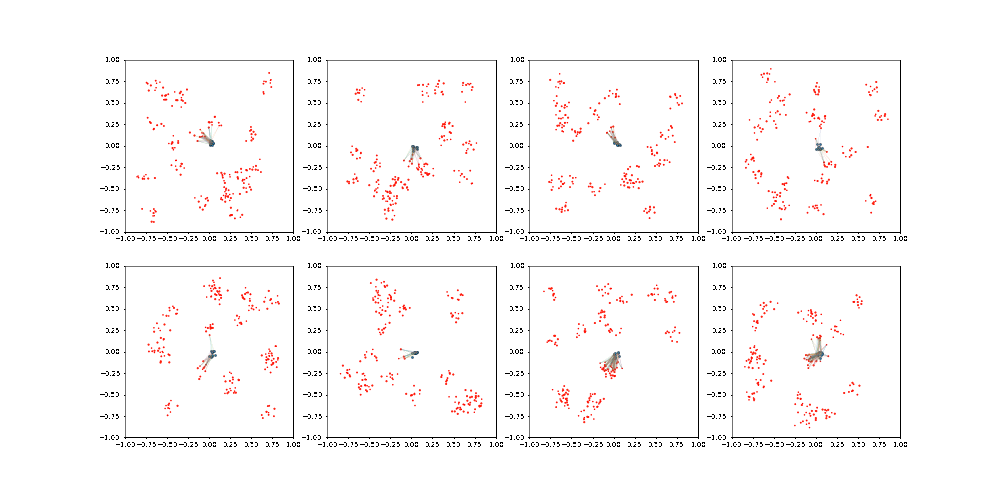

In [ ]:
Image('../animation/' + name + '.gif')

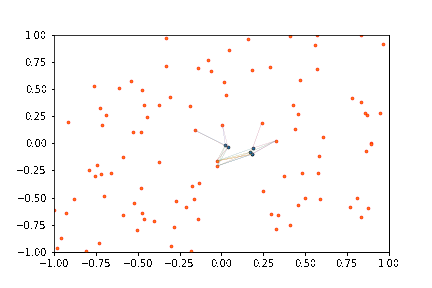

In [ ]:
Image('../animation/GATConv1.gif')

In [ ]:
#anim.frame_seq = anim.new_saved_frame_seq() 
#IPython.display.HTML(anim.to_jshtml())

In [ ]:
print(network)

Conv(
  (conv_layer_food): CustomConvSimple(2, dim=3)
  (conv_layer_cell): CustomConvSimple(2, dim=3)
  (conv_layer_global): CustomConvSimple(2, dim=3)
  (gConvGRU): GConvGRU(
    (conv_x_z): ChebConv(6, 6, K=1, normalization=sym)
    (conv_h_z): ChebConv(6, 6, K=1, normalization=sym)
    (conv_x_r): ChebConv(6, 6, K=1, normalization=sym)
    (conv_h_r): ChebConv(6, 6, K=1, normalization=sym)
    (conv_x_h): ChebConv(6, 6, K=1, normalization=sym)
    (conv_h_h): ChebConv(6, 6, K=1, normalization=sym)
  )
  (mlp_before): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Tanh()
  )
  (conv_layer_cells): CustomConvSimple(2, dim=3)
)


In [ ]:
print('GConvGRU: ', network.gConvGRU)
for param in network.gConvGRU.parameters():
  print(param.data)


GConvGRU:  GConvGRU(
  (conv_x_z): ChebConv(6, 6, K=1, normalization=sym)
  (conv_h_z): ChebConv(6, 6, K=1, normalization=sym)
  (conv_x_r): ChebConv(6, 6, K=1, normalization=sym)
  (conv_h_r): ChebConv(6, 6, K=1, normalization=sym)
  (conv_x_h): ChebConv(6, 6, K=1, normalization=sym)
  (conv_h_h): ChebConv(6, 6, K=1, normalization=sym)
)
tensor([ 0.0993,  0.3970, -0.4113, -0.1856, -0.7408,  0.4399])
tensor([[-0.3863,  0.0366, -0.1030,  0.0173, -0.2665,  0.5586],
        [ 0.0280, -0.3707, -0.1603, -0.0898,  0.1109, -0.2467],
        [ 0.5071, -0.2010,  0.0813, -0.1105, -0.2800,  0.0287],
        [-0.3609,  0.2188,  0.2316, -0.6645,  0.1396,  0.1772],
        [ 0.2553,  0.4126, -0.5393,  0.4019,  0.4537, -0.0696],
        [-0.0202, -0.0478,  0.5156,  0.1993,  0.1468,  0.3622]])
tensor([ 0.6389, -0.6512, -0.0410, -0.3896, -0.0300, -0.1715])
tensor([[ 0.2521,  0.3611, -0.9989, -0.4050, -0.0427,  0.5294],
        [-0.6121,  0.3685, -0.0297,  0.0497,  0.5825, -0.3229],
        [-0.3991,  0

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

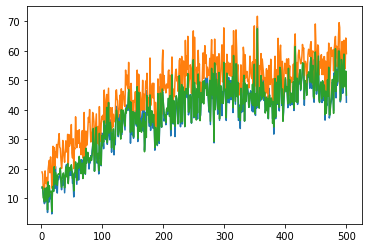

In [ ]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
#print(losses)
#plt.plot(losses.stepsize)

plt.plot(losses.median_eval)
plt.plot(losses.pop_best_eval)
plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()

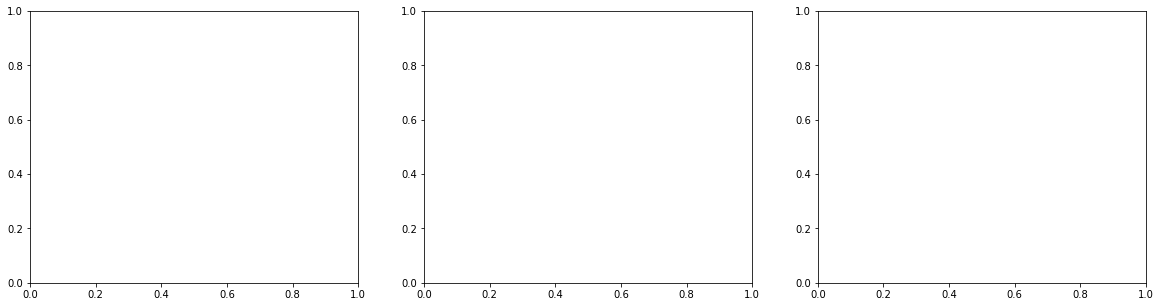

In [ ]:
trainer.logger_df
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('')
plt.show()

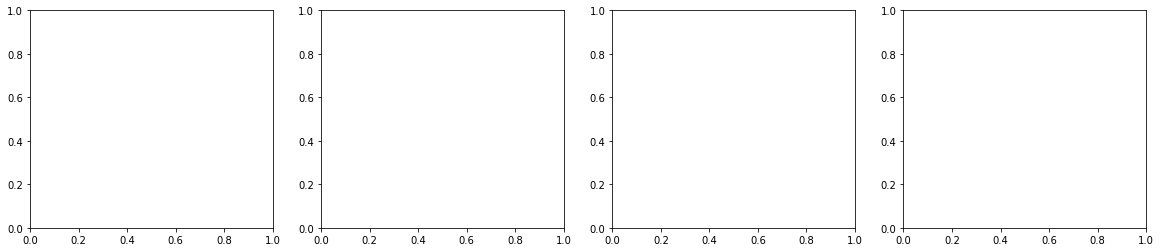

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))